In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


import os
from math import * 
os.getcwd()
print("The current directory is: ")
print(os.getcwd())
path_parent = os.path.dirname(os.getcwd())
os.chdir(path_parent)
print("Moving up to the parent directory")
print(os.getcwd())

The current directory is: 
c:\Users\nguye\Desktop\Crystal-Plasticity-COE-Project\notebooks
Moving up to the parent directory
c:\Users\nguye\Desktop\Crystal-Plasticity-COE-Project


In [72]:
yieldingPoint = 0.004

def getIndexBeforeStrainLevel(strain, level):
    for i in range(len(strain)):
        if strain[i] > level:
            return i - 1

def getIndexAfterHCLevel(HC, level):
    for i in range(len(HC) - 2, 0, -1):
        if HC[i] > level:
            return i + 1
        if HC[i] < HC[i + 1]:
            return i + 1

def preprocessNonlinear(trueStrain, trueStress, strainPathX, strainPathY, strainPathZ):
    strainPathXprocess = strainPathX.copy()
    strainPathYprocess = strainPathY.copy()
    strainPathZprocess = strainPathZ.copy()
    turningIndices = turningStressPoints(trueStress)
    #print(turningIndices)
    #unloadingIndex = turningIndices[0]
    reloadingIndex = turningIndices[1]
    for i in range(reloadingIndex, trueStrain.size):
        strainPathXprocess[i] -= strainPathX[reloadingIndex]
        strainPathYprocess[i] -= strainPathY[reloadingIndex]
        strainPathZprocess[i] -= strainPathZ[reloadingIndex]
    strainReloading = (2/3 * (strainPathXprocess ** 2 + strainPathYprocess ** 2 + strainPathZprocess ** 2)) ** (1/2) + trueStrain[reloadingIndex]
    actualStrain = trueStrain.copy()
    for i in range(reloadingIndex, trueStrain.size):
        actualStrain[i] = strainReloading[i]
    return (actualStrain, trueStress)

def turningStressPoints(trueStress):
    differences = np.diff(trueStress)
    index = 1
    turningIndices = []
    while index < differences.size:
        if (differences[index - 1] <= 0 and differences[index] >= 0) or (differences[index - 1] >= 0 and differences[index] <= 0):
            turningIndices.append(index)
        index += 1
    return turningIndices

def preprocessDAMASKNonlinear(path):
    df = pd.read_csv(path, skiprows = 6, delimiter = "\t")
    trueStrain = df["Mises(ln(V))"].to_numpy().reshape(-1)
    trueStress = df["Mises(Cauchy)"].to_numpy().reshape(-1)
    strainPathX = df["1_ln(V)"].to_numpy().reshape(-1)
    strainPathY = df["5_ln(V)"].to_numpy().reshape(-1)
    strainPathZ = df["9_ln(V)"].to_numpy().reshape(-1)
    return preprocessNonlinear(trueStrain, trueStress, strainPathX, strainPathY, strainPathZ)

################################
# Preprocessing linear loading #
################################

def preprocessLinear(trueStrain, trueStress):
    # truePlasticStrain = trueStrain - trueElasticstrain = trueStrain - trueStress/Young's modulus
    Young = (trueStress[1] - trueStress[0]) / (trueStrain[1] - trueStrain[0])
    truePlasticStrain = trueStrain - trueStress / Young    
    return (truePlasticStrain, trueStress)

def preprocessDAMASKLinear(path):
    df = pd.read_csv(path, skiprows = 6, delimiter = "\t")
    trueStrain = df["Mises(ln(V))"].to_numpy().reshape(-1)
    trueStress = df["Mises(Cauchy)"].to_numpy().reshape(-1)
    return preprocessLinear(trueStrain, trueStress)   

##############################
# Obtain the original curves #
##############################

def preprocessDAMASKTrue(path):
    df = pd.read_csv(path, skiprows = 6, delimiter = "\t")
    trueStrain = df["Mises(ln(V))"]
    trueStress = df["Mises(Cauchy)"] 
    return (trueStrain, trueStress)



## Parameter analysis in the PH model

### Note: no need to multiply stress by 1e-6

In [73]:
# To comment multiple lines, press Ctrl + K + C
# To uncomment multiple lines, press Ctrl + K + U

size = 18

# Parameter a
paramValues = ["1.1","1.5","2","2.5","3","5","7","10"] # <- put the postprocessed files here and rename to the param's value change. Remmeber to keep the exponent
paramName = "a" # <- Change this to the correct parameter. Look up paramNames in GUI.py 
paramNameLatex = "a" # <- Change this to the correct formatted name. Look up paramsFormatted in GUI.py
paramUnit = "" # <- Change this to the correct unit. Look up paramsUnit in GUI.py
legendsize = -4.5
ncol = 2

# Parameter γ̇₀
# paramValues = ["0.0001","0.001","0.01","0.1","1","10","50","100"] # <- put the postprocessed files here and rename to the param's value change. Remmeber to keep the exponent
# paramName = "gdot0" # <- Change this to the correct parameter. Look up paramNames in GUI.py 
# paramNameLatex = "γ̇₀" # <- Change this to the correct formatted name. Look up paramsFormatted in GUI.py
# paramUnit = "e-3" # <- Change this to the correct unit. Look up paramsUnit in GUI.py
# legendsize = -5
# ncol = 2

# Parameter h₀
# paramValues = ["100","200","300","400","800","1200","1600","2000"] # <- put the postprocessed files here and rename to the param's value change. Remmeber to keep the exponent
# paramName = "h0" # <- Change this to the correct parameter. Look up paramNames in GUI.py 
# paramNameLatex = "h₀" # <- Change this to the correct formatted name. Look up paramsFormatted in GUI.py
# paramUnit = "" # <- Change this to the correct unit. Look up paramsUnit in GUI.py
# legendsize = -4.5
# ncol = 2

# Parameter n 
# paramValues = ["10","15","20","40","60","80","100"] # <- put the postprocessed files here and rename to the param's value change. Remmeber to keep the exponent
# paramName = "n" # <- Change this to the correct parameter. Look up paramNames in GUI.py 
# paramNameLatex = "n" # <- Change this to the correct formatted name. Look up paramsFormatted in GUI.py
# paramUnit = "" # <- Change this to the correct unit. Look up paramsUnit in GUI.py
# legendsize = -2
# ncol = 2

# Parameter τ₀
# paramValues = ["1","25","50","75","100","125","150","175","200"] # <- put the postprocessed files here and rename to the param's value change. Remmeber to keep the exponent
# paramName = "tau0" # <- Change this to the correct parameter. Look up paramNames in GUI.py 
# paramNameLatex = "τ₀" # <- Change this to the correct formatted name. Look up paramsFormatted in GUI.py
# paramUnit = "MPa" # <- Change this to the correct unit. Look up paramsUnit in GUI.py
# legendsize = -7
# ncol = 2

# Parameter τₛₐₜ
# paramValues = ["50","100","150","200","300","400","600","800","1000"] # <- put the postprocessed files here and rename to the param's value change. Remmeber to keep the exponent
# paramName = "tausat" # <- Change this to the correct parameter. Look up paramNames in GUI.py 
# paramNameLatex = "τₛₐₜ" # <- Change this to the correct formatted name. Look up paramsFormatted in GUI.py
# paramUnit = "MPa" # <- Change this to the correct unit. Look up paramsUnit in GUI.py
# legendsize = -9
# ncol = 3

# parameter self 
# paramValues = ["0.01","0.25","0.5","0.75","1","1.25","1.5","1.75","2"]
# paramName = "self" # <- Change this to the correct parameter. Look up paramNames in GUI.py 
# paramNameLatex = "self" # <- Change this to the correct formatted name. Look up paramsFormatted in GUI.py
# paramUnit = "" # <- Change this to the correct unit. Look up paramsUnit in GUI.py
# legendsize = -2
# ncol = 2

# parameter coplanar
# paramValues = ["0.01","0.5","1","2"]
# paramName = "coplanar" # <- Change this to the correct parameter. Look up paramNames in GUI.py 
# paramNameLatex = "coplanar" # <- Change this to the correct formatted name. Look up paramsFormatted in GUI.py
# paramUnit = "" # <- Change this to the correct unit. Look up paramsUnit in GUI.py
# legendsize = -2
# ncol = 1

# parameter collinear
# paramValues = ["0.01","1","5","10","15","20","25"]
# paramName = "collinear" # <- Change this to the correct parameter. Look up paramNames in GUI.py 
# paramNameLatex = "collinear" # <- Change this to the correct formatted name. Look up paramsFormatted in GUI.py
# paramUnit = "" # <- Change this to the correct unit. Look up paramsUnit in GUI.py
# legendsize = -2
# ncol = 2

# parameter orthogonal
# paramValues= ["0.01","1","2","3"]
# paramName = "orthogonal" # <- Change this to the correct parameter. Look up paramNames in GUI.py 
# paramNameLatex = "orthogonal" # <- Change this to the correct formatted name. Look up paramsFormatted in GUI.py
# paramUnit = "" # <- Change this to the correct unit. Look up paramsUnit in GUI.py
# legendsize = -2
# ncol = 1

# parameter glissile
# paramValues = ["0.01","1","2","3"]
# paramName = "glissile" # <- Change this to the correct parameter. Look up paramNames in GUI.py 
# paramNameLatex = "glissile" # <- Change this to the correct formatted name. Look up paramsFormatted in GUI.py
# paramUnit = "" # <- Change this to the correct unit. Look up paramsUnit in GUI.py
# legendsize = -2
# ncol = 1

# parameter sessile
# paramValues = ["0.01","1","2","3"]
# paramName = "sessile" # <- Change this to the correct parameter. Look up paramNames in GUI.py 
# paramNameLatex = "sessile" # <- Change this to the correct formatted name. Look up paramsFormatted in GUI.py
# paramUnit = "" # <- Change this to the correct unit. Look up paramsUnit in GUI.py
# legendsize = -2
# ncol = 1

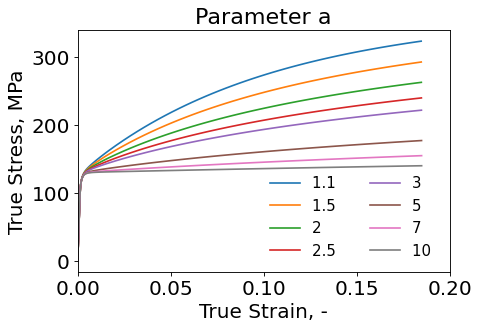

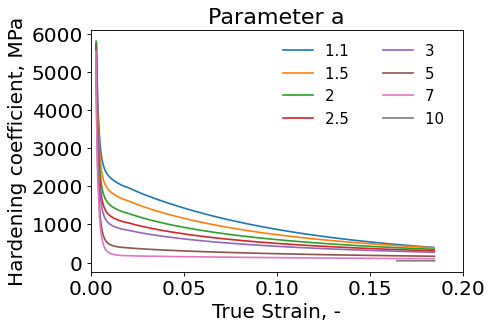

In [74]:
# Plotting the curves analysis
figure(figsize=(6, 4), dpi=80)
for paramValue in paramValues: 
    path = f"notebooks/parameters_analysis_linear/PH/{paramName}/{paramValue}.txt"
    trueStrain, trueStress = preprocessDAMASKTrue(path)
    plt.plot(trueStrain, trueStress, label = f"{paramValue} {paramUnit}")#, marker='.', markersize=5)

plt.title(f"Parameter {paramNameLatex}", size=size + 2)
plt.xticks(fontsize=size)    
plt.yticks(fontsize=size)  
plt.xlim([0, 0.2])

plt.ylabel('True Stress, MPa', size=size)
plt.xlabel("True Strain, -", size=size)
legend = plt.legend(loc=4, frameon=False, fontsize=size + legendsize, ncol=ncol, facecolor='white') #, shadow =True, framealpha=1)
legend.get_frame().set_linewidth(0.0)

# Plotting the hardening coefficients analysis
figure(figsize=(6, 4), dpi=80)
for paramValue in paramValues: 
    path = f"notebooks/parameters_analysis_linear/PH/{paramName}/{paramValue}.txt"
    trueStrain, trueStress = preprocessDAMASKTrue(path)
    # beforeYieldingIndex = getIndexBeforeStrainLevel(trueStrain, yieldingPoint) + hardeningCoeffIndex
    # plasticStrain = trueStrain[beforeYieldingIndex:]
    # plasticStress = trueStress[beforeYieldingIndex:]
    hardening_coefficient = np.diff(trueStress)/np.diff(trueStrain)
    indexHC = getIndexAfterHCLevel(hardening_coefficient, 6000)
    hardening_coefficient = hardening_coefficient[indexHC:]
    plasticStrain = trueStrain[indexHC+1:]
    plt.plot(plasticStrain, hardening_coefficient, label = f"{paramValue} {paramUnit}") #marker='.', markersize=5)

plt.title(f"Parameter {paramNameLatex}", size=size + 2)
plt.rc('xtick', labelsize=size)    
plt.rc('ytick', labelsize=size)  
plt.yticks([0,1000,2000,3000,4000,5000,6000])  
plt.xlim([0, 0.2])
plt.ylabel('Hardening coefficient, MPa', size=size)
plt.xlabel("True Strain, -", size=size)
legend = plt.legend(loc=1, frameon=False, fontsize=size + legendsize, ncol=ncol, facecolor='white') #, shadow =True, framealpha=1)
legend.get_frame().set_linewidth(0.0)

## Parameter analysis in the DB model

### Note: need to multiply stress by 1e-6

In [87]:
# To comment multiple lines, press Ctrl + K + C
# To uncomment multiple lines, press Ctrl + K + U

size = 18

# Parameter dα
paramValues = ["0.01","1","2","3","4","5","6","7","8","10"] # <- put the postprocessed files here and rename to the param's value change
paramName = "dipole"
paramNameLatex = "dα"
paramUnit = "b"
legendsize = -4
ncol = 2

# Parameter iₛₗᵢₚ
# paramValues = ["50", "75", "100","150","200","400","600","1000"]
# paramName = "islip"
# paramNameLatex = "iₛₗᵢₚ"
# paramUnit = ""
# legendsize = -4
# ncol = 2

# Parameter Ω
# paramValues = ["0.01","5","10","15","20","30","40","50"] # <- put the postprocessed files here and rename to the param's value change
# paramName = "omega"
# paramNameLatex = "Ω"
# paramUnit = "b³"
# legendsize = -4
# ncol = 2

# Parameter p
# paramValues = ["0.2","0.4","0.6","0.8","1"]
# paramName = "p"
# paramNameLatex = "p"
# paramUnit = ""
# legendsize = -4
# ncol = 2

# Parameter q
# paramValues = ["1","1.2","1.4","1.6","1.8","2"]
# paramName = "q"
# paramNameLatex = "q"
# paramUnit = ""
# legendsize = -4
# ncol = 2

# Parameter τₛₒₗ
# paramValues = ["25", "50", "75", "100", "125", "150", "175", "200"] # <- put the postprocessed files here and rename to the param's value change
# paramName = "tausol"
# paramNameLatex = "τₛₒₗ"
# paramUnit = "MPA"
# legendsize = -4
# ncol = 2

# parameter ρe
# paramValues = ["0.001e12", "2.5e12", "5e12", "7.5e12", "10e12", "12.5e12", "15e12", "17.5e12", "20e12"]
# paramName = "rho_e"
# paramNameLatex = "ρe"
# paramUnit = "m⁻²"
# legendsize = -6.5
# ncol = 2

# parameter ρd
# paramValues = ["1e-9","1e-6","1e-3","1","7","10","1e6","1e9"]
# paramName = "rho_d"
# paramNameLatex = "ρd"
# paramUnit = "m⁻²"
# legendsize = -4
# ncol = 2

# parameter v₀
# paramValues = ["1e-5", "3e-5", "10e-5", "30e-5", "100e-5", "300e-5"]
# paramName = "v0"
# paramNameLatex = "v₀"
# paramUnit = "m/s"
# legendsize = -4
# ncol = 2

# parameter Qs
# paramValues = ["0.7e-19","1e-19","1.5e-19" , "2e-19" , "2.5e-19","3e-19","4e-19", "5e-19", "8e-19", "10e-19"]
# paramName= "Qs"
# paramNameLatex = "Qs"
# paramUnit = "J"
# legendsize = -4
# ncol = 2

# parameter Qc
# paramValues = ["1.7e-19","1.75e-19", "1.8e-19","1.85e-19", "1.9e-19", "1.95e-19", "2e-19", "3e-19", "4e-19", "5e-19"]
# paramName = "Qc"
# paramNameLatex = "Qc"
# paramUnit = "J"
# legendsize = -4
# ncol = 2

# parameter D₀
# paramValues = ["1e-4", "10e-4","20e-4","50e-4", "100e-4","500e-4","1000e-4"]
# paramName = "D0"
# paramNameLatex = "D₀"
# paramUnit = "m²/s"
# legendsize = -4
# ncol = 2

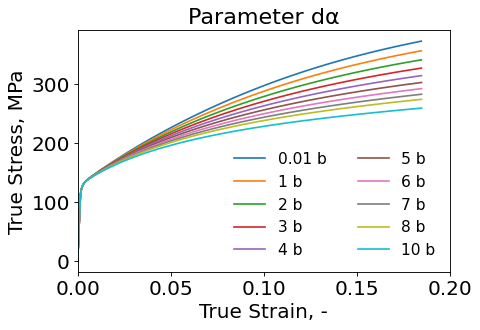

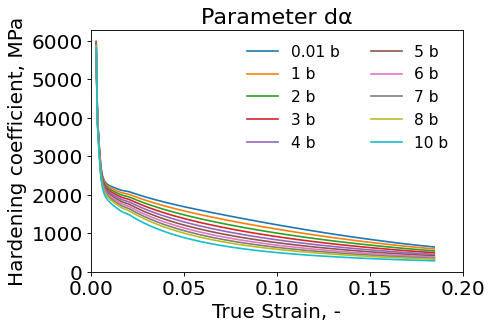

In [88]:
# Plotting the curves analysis
figure(figsize=(6, 4), dpi=80)
for paramValue in paramValues: 
    path = f"notebooks/parameters_analysis_linear/DB/{paramName}/{paramValue}.txt"
    trueStrain, trueStress = preprocessDAMASKTrue(path)
    trueStress *= 1e-6
    plt.plot(trueStrain, trueStress, label = f"{paramValue} {paramUnit}")#, marker='.', markersize=5)

plt.title(f"Parameter {paramNameLatex}", size=size + 2)
plt.xticks(fontsize=size)    
plt.yticks(fontsize=size)  
plt.xlim([0, 0.2])

plt.ylabel('True Stress, MPa', size=size)
plt.xlabel("True Strain, -", size=size)
legend = plt.legend(loc=4, frameon=False, fontsize=size + legendsize, ncol=ncol, facecolor='white') #, shadow =True, framealpha=1)
legend.get_frame().set_linewidth(0.0)

# Plotting the hardening coefficients analysis
figure(figsize=(6, 4), dpi=80)
for paramValue in paramValues: 
    path = f"notebooks/parameters_analysis_linear/DB/{paramName}/{paramValue}.txt"
    trueStrain, trueStress = preprocessDAMASKTrue(path)
    trueStress *= 1e-6
    # beforeYieldingIndex = getIndexBeforeStrainLevel(trueStrain, yieldingPoint) + hardeningCoeffIndex
    # plasticStrain = trueStrain[beforeYieldingIndex:]
    # plasticStress = trueStress[beforeYieldingIndex:]
    hardening_coefficient = np.diff(trueStress)/np.diff(trueStrain)
    indexHC = getIndexAfterHCLevel(hardening_coefficient, 6000)
    hardening_coefficient = hardening_coefficient[indexHC:]
    plasticStrain = trueStrain[indexHC+1:]
    plt.plot(plasticStrain, hardening_coefficient, label = f"{paramValue} {paramUnit}") #marker='.', markersize=5)

plt.title(f"Parameter {paramNameLatex}", size=size + 2)
plt.rc('xtick', labelsize=size)    
plt.rc('ytick', labelsize=size)  
plt.yticks([0,1000,2000,3000,4000,5000,6000])  
plt.xlim([0, 0.2])
plt.ylabel('Hardening coefficient, MPa', size=size)
plt.xlabel("True Strain, -", size=size)
legend = plt.legend(loc=1, frameon=False, fontsize=size + legendsize, ncol=ncol, facecolor='white') #, shadow =True, framealpha=1)
legend.get_frame().set_linewidth(0.0)
